# 第1章: 统计学习及监督学习概论

在这一章，用python实现最小二乘法，并完成书中P20页的例1.1。

### 要做什么
对于输入样本$x_i$,我们要做的就是找到$w(w_0,w_1,w_2,...,w_n)$,使得预测函数$f(x_i,w)=w_0+w_1x_i+w_2x_i^2+...+w_nx_i^n$与样本期望输出$y_i$的损失函数$L(y_i,f(x_i))$最小。

### 为什么选择最小二乘法
假定误差$e_1,e_2,...,e_n$独立同分布，那么在所有无偏的线性估计类中，最小二乘法所得到的方差最小。（高斯于1823年证明）

### Code
实现例1.1：我们使用目标函数$y=sin2{\pi}x$,然后加上一个呈正态分布的噪音，生成目标数据。然后我们使用多项式拟合这些数据，求得我们需要的多项式模型。

In [1]:
# import packages

import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

%matplotlib inline

在python中生成$1x^2+2x^1+3x^0$的代码为numpy.poly1d([1,2,3])

In [2]:
# desired output function
def desired_output(x):
    return np.sin(2*np.pi*x)

# building  predict model
def predict_output(p, x):
    f = np.poly1d(p)
    return f(x)

# building loss function
def loss_func(p, x, y):
    loss = predict_output(p, x) - y
    return loss

# fitting and visualization
def fitting(x_points, y_points, x, N=0): # (N+1) is the number of degree polynomial
    parameters_init = np.random.rand(N+1) #random initialization
    parameters_lsq = leastsq(loss_func, parameters_init, args=(x_points, y_points)) # least squares method
    print('Fitting parameters : ', parameters_lsq)
    
    #visualization
    plt.plot(x, desired_output(x), label='desires output')
    plt.plot(x, predict_output(parameters_lsq[0], x), label='predict output')
    plt.plot(x_points, y_points, 'bo', label='add noise output')
    plt.legend()
    return parameters_lsq

In [3]:
# generate dataset
x = np.linspace(0, 1, 1000)

# pick 10 points
x_points = np.linspace(0, 1, 10)
y_ = desired_output(x_points)

# add noise: mean=0, standard deviation=0.1
y_points = [np.random.normal(0, 0.1)+y_point for y_point in y_] 

Fitting parameters :  (array([0.00753124]), 1)


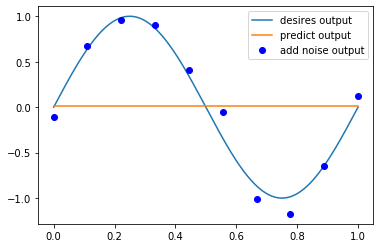

In [4]:
# N=0
parameters_lsq_0 = fitting(x_points, y_points, x, 0)

Fitting parameters :  (array([-1.30625344,  0.66065796]), 1)


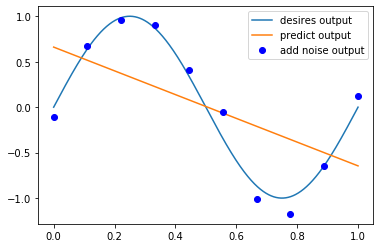

In [5]:
# N=1
parameters_lsq_1 = fitting(x_points, y_points, x, 1)

Fitting parameters :  (array([ 23.72920113, -35.83396254,  12.43904533,  -0.1951901 ]), 1)


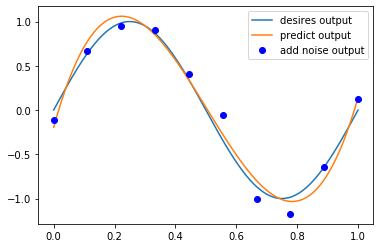

In [6]:
# N=3
parameters_lsq_3 = fitting(x_points, y_points, x, 3)

Fitting parameters :  (array([ 4.06184176e+04, -1.80978712e+05,  3.37900459e+05, -3.43355147e+05,
        2.06294244e+05, -7.44126111e+04,  1.55742104e+04, -1.72262947e+03,
        8.20015450e+01, -1.10312482e-01]), 2)


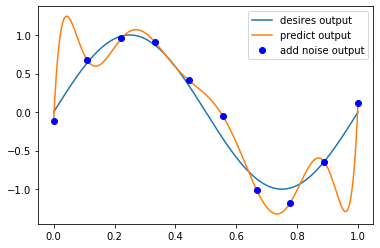

In [7]:
# N=9
parameters_lsq_9 = fitting(x_points, y_points, x, 9)

The function is overfitting when N=9.

### regularization

当结果出现过拟合时，我们一般引入正则化项来降低过拟合。目前在机器学习中正则化项一般都使用$L_2$范数。

$J(x)=\sum_{i=1}^N(f(x_i)-y_i)^2+\lambda||w||^2$

式中：$||w||^2为L_2范数的平方$

$||w||为L_2$范式,其含义是： L2范数是指向量各元素的平方和然后开平方根。

- $L_2$ norm : 欧几里德距离
- $L_1$ norm : 绝对值相加，又称曼哈顿距离
- $L_0$ norm : 向量中非零元素的个数

In [8]:
lambda_reg = 0.0001

def loss_add_regularization(p, x, y):
    loss = predict_output(p, x) - y
#     loss = np.square(loss) + (0.5 * lambda_reg * np.square(p))
    loss = np.append(np.square(loss), (0.5 * lambda_reg * np.square(p)))
    return loss

这里需要说明的是：使用加法的loss与直接append的loss效果是一样的，最小二乘法做到的就是使最后的loss之和最小，因此直接加上去与append最终plot的图像可以看到是一样的。通过输出time可以看到，使用append的方法运行时间更短。

[-12.04762564  -0.53397291  10.07831893  10.69970036   8.8833399
  -5.39762373  -9.12172964  -9.57605684   7.25027846  -0.064128  ]


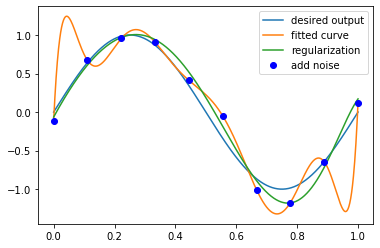

In [9]:
# import time
# start = time.time()

# new least squares method which add regularization
parameters_init = np.random.rand(9+1)
parameters_lsq_reg = leastsq(loss_add_regularization, parameters_init, args=(x_points, y_points))
print(parameters_lsq_reg[0])

# visualization
plt.plot(x, desired_output(x), label='desired output')
plt.plot(x, predict_output(parameters_lsq_9[0], x), label='fitted curve')
plt.plot(x, predict_output(parameters_lsq_reg[0], x), label='regularization')
plt.plot(x_points, y_points, 'bo', label='add noise')
plt.legend()

# print(time.time()-start)